In [0]:
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.utils.data as data
import torch.nn as nn
import torch.optim as optim
import time
import numpy as np
from sklearn.metrics import accuracy_score
import torch.nn.functional as F
from sklearn.datasets import make_gaussian_quantiles

In [0]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

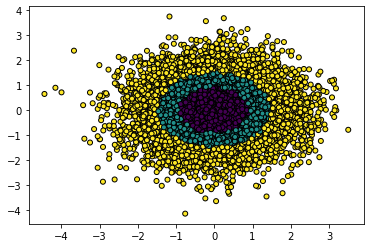

In [216]:
#create some data
X, Y = make_gaussian_quantiles(n_samples=10000, n_features=2, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, s=25, edgecolor='k')

In [224]:
df = pd.DataFrame(X,columns=['x0','x1'])
df['c'] = Y
df

x0        x1  c
0     1.224480  2.598398  2
1    -0.754753 -0.966536  1
2    -0.470186  0.439993  0
3     0.984059 -0.686332  1
4     0.895717 -0.243912  1
...        ...       ... ..
9995  1.116911 -1.333686  2
9996 -1.108705  0.647743  1
9997 -0.639741  1.540906  2
9998 -0.220714 -1.304967  1
9999 -0.724472 -0.969397  1

[10000 rows x 3 columns]

In [0]:
data_x = torch.tensor(df[['x0','x1']].values).float()
data_y = torch.tensor(df['c'].values)
dataset = data.TensorDataset(data_x, data_y)

In [0]:
splits = [7000,2000,1000]
assert sum(splits) == len(df)
trainset,devset,testset = torch.utils.data.random_split(dataset, splits)
train_dataloader = data.DataLoader(trainset,batch_size=64,shuffle=True)
dev_dataloader = data.DataLoader(devset,batch_size=64,shuffle=True)
test_dataloader = data.DataLoader(testset,batch_size=64,shuffle=True)

In [0]:
# fit/test functions
def fit(iterator, model, optimizer, criterion):
    train_loss = 0
    train_acc = 0
    model.train()
    all_y = []
    all_y_hat = []
    for x,y in iterator:
        optimizer.zero_grad()
        y_hat = model(x)
        loss = criterion(y_hat, y)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        all_y.append(y)
        all_y_hat.append(y_hat)
    y = torch.cat(all_y,dim=0)
    y_hat = torch.cat(all_y_hat,dim=0)
    acc = accuracy_score(y.cpu(),y_hat.argmax(1).detach().cpu())
    return train_loss / len(iterator.dataset), acc

def test(iterator, model, criterion):
    train_loss = 0
    train_acc = 0
    model.eval()
    all_y = []
    all_y_hat = []
    for x,y in iterator:                    
        with torch.no_grad():
            y_hat = model(x)
        loss = criterion(y_hat, y)
        train_loss += loss.item()
        
        all_y.append(y)
        all_y_hat.append(y_hat)
    y = torch.cat(all_y,dim=0)
    y_hat = torch.cat(all_y_hat,dim=0)
    acc = accuracy_score(y.cpu(),y_hat.argmax(1).detach().cpu())
    return train_loss / len(iterator.dataset), acc

In [0]:
def plot_test(model):
    model.eval()
    with torch.no_grad():
        infered = [(x,model(x).argmax().item()) for (x,y) in testset]
    X = np.array([x.detach().numpy() for (x,yhat) in infered])
    Yhat = [yhat for (x,yhat) in infered]
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=Yhat, s=25, edgecolor='k') 
    plt.show()

In [0]:
def train_n_epochs(model, n, optimizer):

    criterion = nn.CrossEntropyLoss().to(device)
    for epoch in range(n):
        start_time = time.time()
        train_loss, train_acc = fit(train_dataloader, model, optimizer, criterion)
        valid_loss, valid_acc = test(dev_dataloader, model, criterion)

        secs = int(time.time() - start_time)
        mins = secs / 60
        secs = secs % 60
        plot_test(model)
        print('Epoch: %d' % (epoch), " | time in %d minutes, %d seconds" % (mins, secs))
        print(f'\tTrain Loss: {train_loss:.4f}\t|\tAccuracy: {train_acc :.6f}')
        print(f'\tValidation Loss: {valid_loss:.4f}\t|\tAccuracy: {valid_acc:.6f}') 

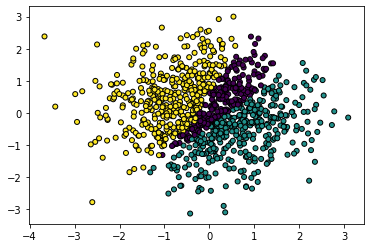

Epoch: 0  | time in 0 minutes, 0 seconds
	Train Loss: 0.0174	|	Accuracy: 0.351000
	Validation Loss: 0.0171	|	Accuracy: 0.412000


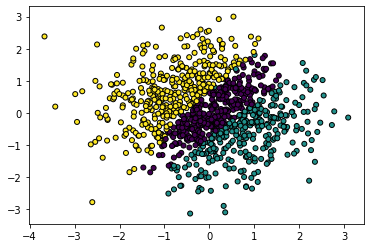

Epoch: 1  | time in 0 minutes, 0 seconds
	Train Loss: 0.0166	|	Accuracy: 0.454143
	Validation Loss: 0.0166	|	Accuracy: 0.486000


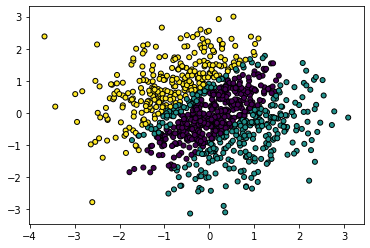

Epoch: 2  | time in 0 minutes, 0 seconds
	Train Loss: 0.0160	|	Accuracy: 0.495571
	Validation Loss: 0.0161	|	Accuracy: 0.503000


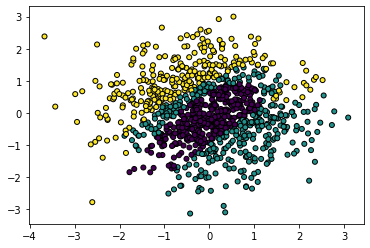

Epoch: 3  | time in 0 minutes, 0 seconds
	Train Loss: 0.0154	|	Accuracy: 0.528714
	Validation Loss: 0.0155	|	Accuracy: 0.560500


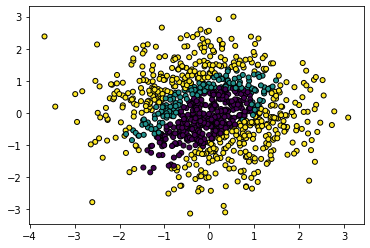

Epoch: 4  | time in 0 minutes, 0 seconds
	Train Loss: 0.0147	|	Accuracy: 0.606286
	Validation Loss: 0.0147	|	Accuracy: 0.625000


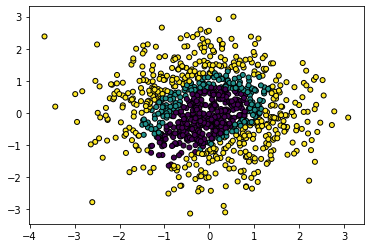

Epoch: 5  | time in 0 minutes, 0 seconds
	Train Loss: 0.0139	|	Accuracy: 0.681143
	Validation Loss: 0.0138	|	Accuracy: 0.690500


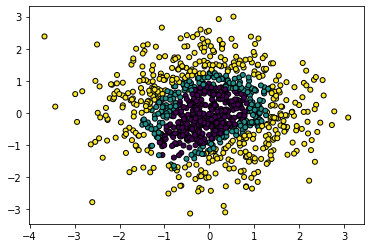

Epoch: 6  | time in 0 minutes, 0 seconds
	Train Loss: 0.0130	|	Accuracy: 0.740143
	Validation Loss: 0.0128	|	Accuracy: 0.773000


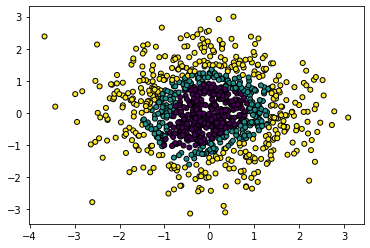

Epoch: 7  | time in 0 minutes, 0 seconds
	Train Loss: 0.0120	|	Accuracy: 0.804429
	Validation Loss: 0.0119	|	Accuracy: 0.825000


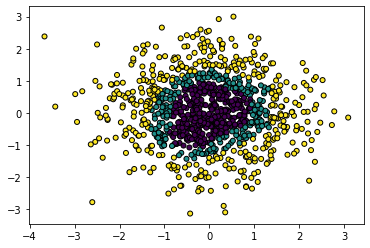

Epoch: 8  | time in 0 minutes, 0 seconds
	Train Loss: 0.0112	|	Accuracy: 0.849571
	Validation Loss: 0.0111	|	Accuracy: 0.860000


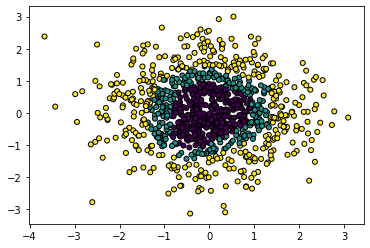

Epoch: 9  | time in 0 minutes, 0 seconds
	Train Loss: 0.0104	|	Accuracy: 0.877286
	Validation Loss: 0.0104	|	Accuracy: 0.884500


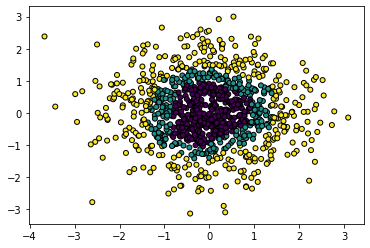

Epoch: 10  | time in 0 minutes, 0 seconds
	Train Loss: 0.0098	|	Accuracy: 0.895000
	Validation Loss: 0.0098	|	Accuracy: 0.894000


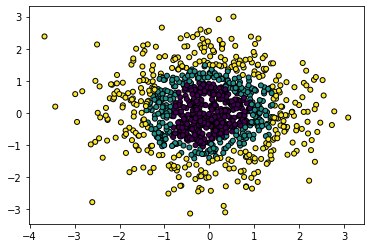

Epoch: 11  | time in 0 minutes, 0 seconds
	Train Loss: 0.0092	|	Accuracy: 0.906000
	Validation Loss: 0.0092	|	Accuracy: 0.914500


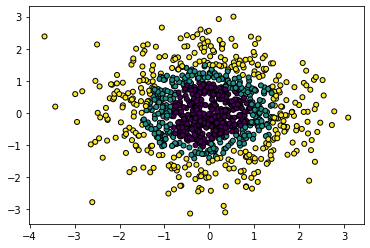

Epoch: 12  | time in 0 minutes, 0 seconds
	Train Loss: 0.0087	|	Accuracy: 0.913143
	Validation Loss: 0.0087	|	Accuracy: 0.924500


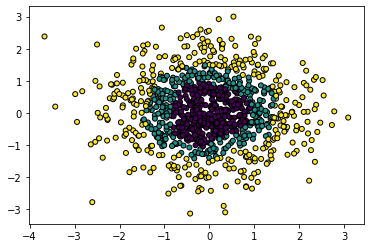

Epoch: 13  | time in 0 minutes, 0 seconds
	Train Loss: 0.0083	|	Accuracy: 0.922286
	Validation Loss: 0.0082	|	Accuracy: 0.927000


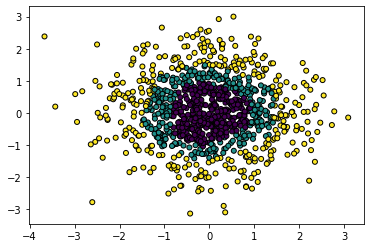

Epoch: 14  | time in 0 minutes, 0 seconds
	Train Loss: 0.0079	|	Accuracy: 0.922000
	Validation Loss: 0.0078	|	Accuracy: 0.929500


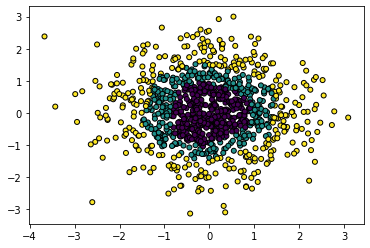

Epoch: 15  | time in 0 minutes, 0 seconds
	Train Loss: 0.0075	|	Accuracy: 0.924571
	Validation Loss: 0.0075	|	Accuracy: 0.931000


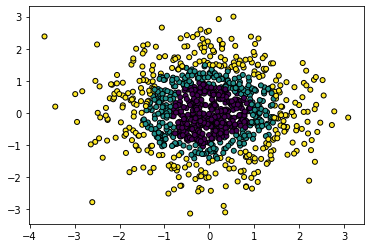

Epoch: 16  | time in 0 minutes, 0 seconds
	Train Loss: 0.0071	|	Accuracy: 0.928857
	Validation Loss: 0.0071	|	Accuracy: 0.931000


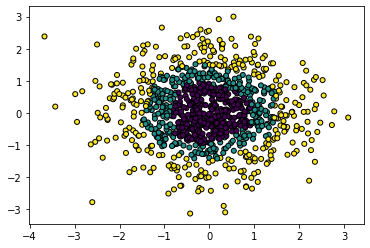

Epoch: 17  | time in 0 minutes, 0 seconds
	Train Loss: 0.0068	|	Accuracy: 0.930714
	Validation Loss: 0.0068	|	Accuracy: 0.929500


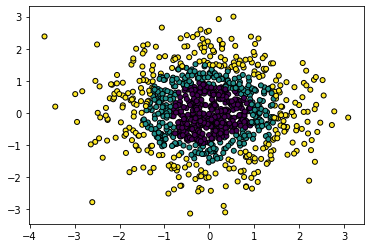

Epoch: 18  | time in 0 minutes, 0 seconds
	Train Loss: 0.0066	|	Accuracy: 0.931714
	Validation Loss: 0.0066	|	Accuracy: 0.934500


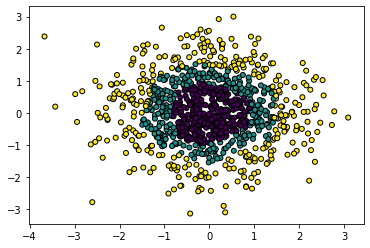

Epoch: 19  | time in 0 minutes, 0 seconds
	Train Loss: 0.0063	|	Accuracy: 0.934857
	Validation Loss: 0.0063	|	Accuracy: 0.932500


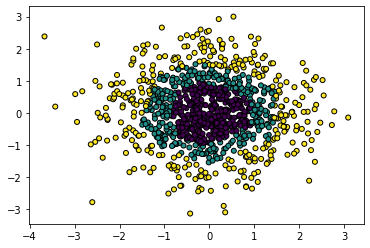

Epoch: 20  | time in 0 minutes, 0 seconds
	Train Loss: 0.0060	|	Accuracy: 0.936714
	Validation Loss: 0.0061	|	Accuracy: 0.937500


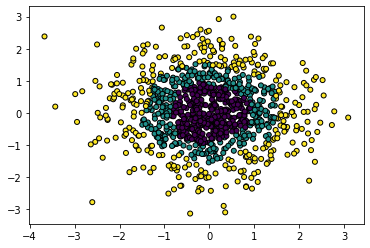

Epoch: 21  | time in 0 minutes, 0 seconds
	Train Loss: 0.0058	|	Accuracy: 0.936000
	Validation Loss: 0.0059	|	Accuracy: 0.937000


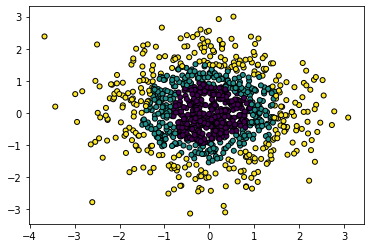

Epoch: 22  | time in 0 minutes, 0 seconds
	Train Loss: 0.0056	|	Accuracy: 0.938857
	Validation Loss: 0.0057	|	Accuracy: 0.937500


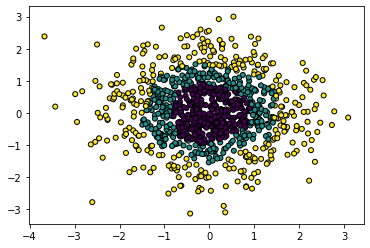

Epoch: 23  | time in 0 minutes, 0 seconds
	Train Loss: 0.0054	|	Accuracy: 0.938714
	Validation Loss: 0.0055	|	Accuracy: 0.940500


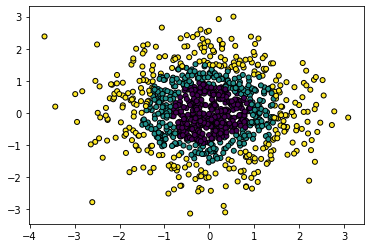

Epoch: 24  | time in 0 minutes, 0 seconds
	Train Loss: 0.0053	|	Accuracy: 0.940286
	Validation Loss: 0.0053	|	Accuracy: 0.941500


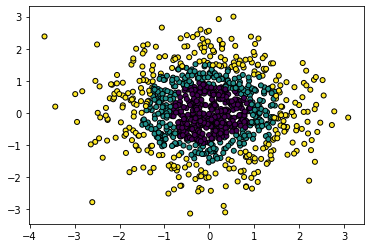

Epoch: 25  | time in 0 minutes, 0 seconds
	Train Loss: 0.0051	|	Accuracy: 0.940000
	Validation Loss: 0.0051	|	Accuracy: 0.941500


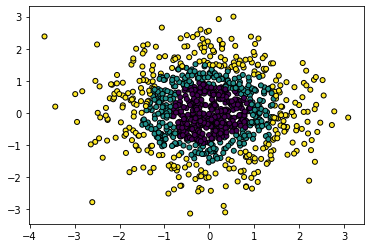

Epoch: 26  | time in 0 minutes, 0 seconds
	Train Loss: 0.0050	|	Accuracy: 0.942143
	Validation Loss: 0.0050	|	Accuracy: 0.946000


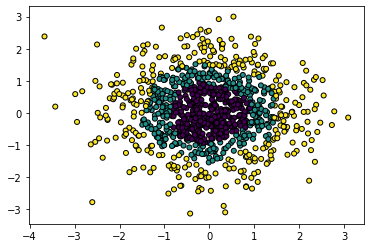

Epoch: 27  | time in 0 minutes, 0 seconds
	Train Loss: 0.0048	|	Accuracy: 0.941857
	Validation Loss: 0.0049	|	Accuracy: 0.941500


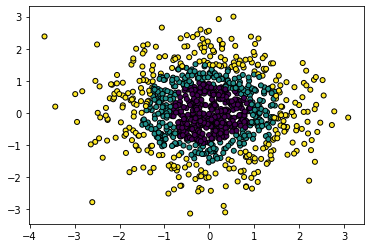

Epoch: 28  | time in 0 minutes, 0 seconds
	Train Loss: 0.0047	|	Accuracy: 0.942286
	Validation Loss: 0.0047	|	Accuracy: 0.944000


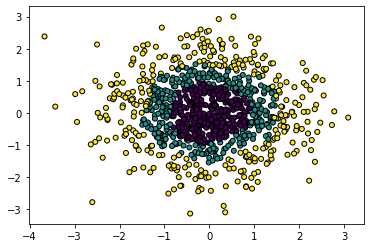

Epoch: 29  | time in 0 minutes, 0 seconds
	Train Loss: 0.0046	|	Accuracy: 0.941000
	Validation Loss: 0.0046	|	Accuracy: 0.943500


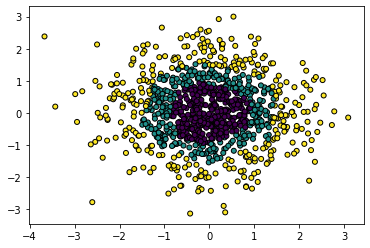

Epoch: 30  | time in 0 minutes, 0 seconds
	Train Loss: 0.0045	|	Accuracy: 0.944286
	Validation Loss: 0.0045	|	Accuracy: 0.947500


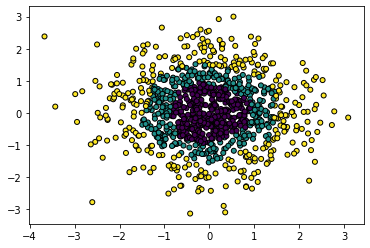

Epoch: 31  | time in 0 minutes, 0 seconds
	Train Loss: 0.0043	|	Accuracy: 0.943857
	Validation Loss: 0.0044	|	Accuracy: 0.942500


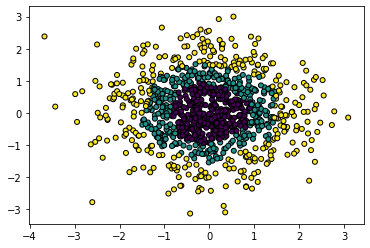

Epoch: 32  | time in 0 minutes, 0 seconds
	Train Loss: 0.0042	|	Accuracy: 0.944857
	Validation Loss: 0.0043	|	Accuracy: 0.945000


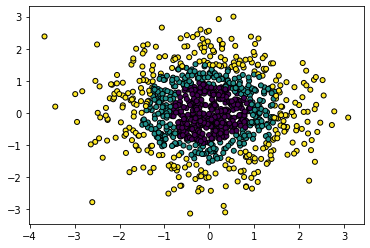

Epoch: 33  | time in 0 minutes, 0 seconds
	Train Loss: 0.0042	|	Accuracy: 0.947000
	Validation Loss: 0.0042	|	Accuracy: 0.945000


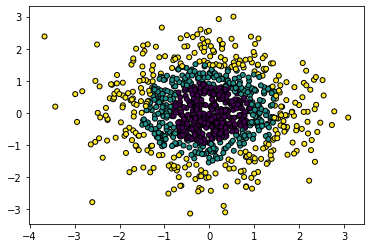

Epoch: 34  | time in 0 minutes, 0 seconds
	Train Loss: 0.0041	|	Accuracy: 0.947857
	Validation Loss: 0.0041	|	Accuracy: 0.946000


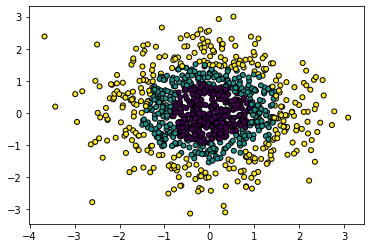

Epoch: 35  | time in 0 minutes, 0 seconds
	Train Loss: 0.0040	|	Accuracy: 0.948714
	Validation Loss: 0.0040	|	Accuracy: 0.945500


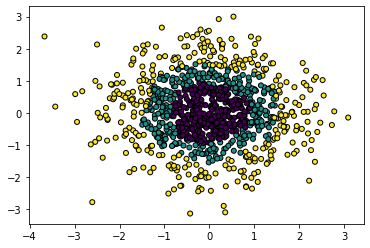

Epoch: 36  | time in 0 minutes, 0 seconds
	Train Loss: 0.0039	|	Accuracy: 0.949143
	Validation Loss: 0.0039	|	Accuracy: 0.945000


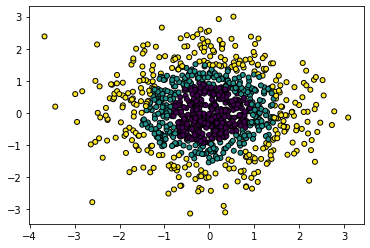

Epoch: 37  | time in 0 minutes, 0 seconds
	Train Loss: 0.0038	|	Accuracy: 0.949286
	Validation Loss: 0.0039	|	Accuracy: 0.948000


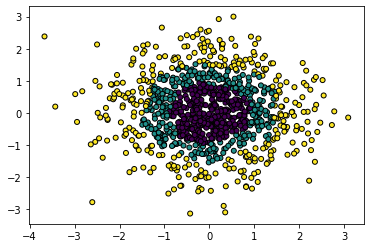

Epoch: 38  | time in 0 minutes, 0 seconds
	Train Loss: 0.0037	|	Accuracy: 0.950714
	Validation Loss: 0.0038	|	Accuracy: 0.948500


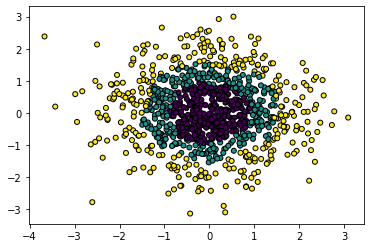

Epoch: 39  | time in 0 minutes, 0 seconds
	Train Loss: 0.0037	|	Accuracy: 0.949286
	Validation Loss: 0.0037	|	Accuracy: 0.946000


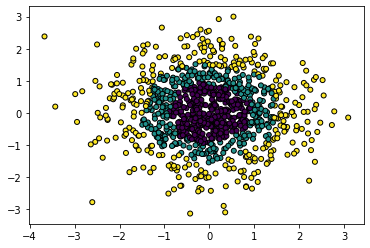

Epoch: 40  | time in 0 minutes, 0 seconds
	Train Loss: 0.0036	|	Accuracy: 0.950571
	Validation Loss: 0.0037	|	Accuracy: 0.948500


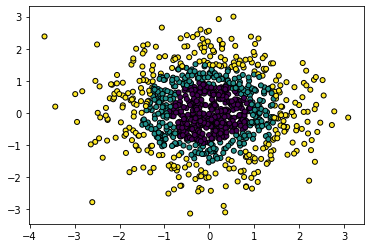

Epoch: 41  | time in 0 minutes, 0 seconds
	Train Loss: 0.0036	|	Accuracy: 0.949571
	Validation Loss: 0.0036	|	Accuracy: 0.949500


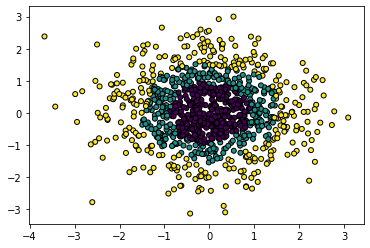

Epoch: 42  | time in 0 minutes, 0 seconds
	Train Loss: 0.0035	|	Accuracy: 0.950571
	Validation Loss: 0.0035	|	Accuracy: 0.948500


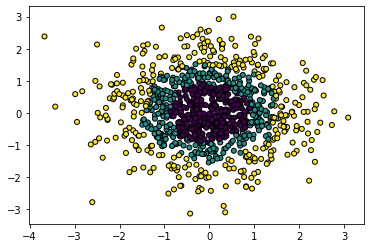

Epoch: 43  | time in 0 minutes, 0 seconds
	Train Loss: 0.0034	|	Accuracy: 0.948857
	Validation Loss: 0.0035	|	Accuracy: 0.953000


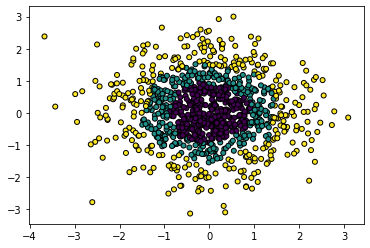

Epoch: 44  | time in 0 minutes, 0 seconds
	Train Loss: 0.0034	|	Accuracy: 0.950714
	Validation Loss: 0.0034	|	Accuracy: 0.953000


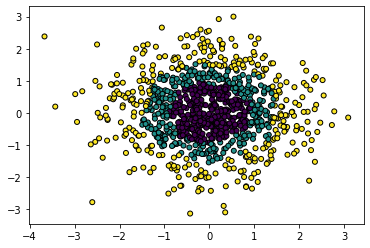

Epoch: 45  | time in 0 minutes, 0 seconds
	Train Loss: 0.0033	|	Accuracy: 0.952571
	Validation Loss: 0.0033	|	Accuracy: 0.952000


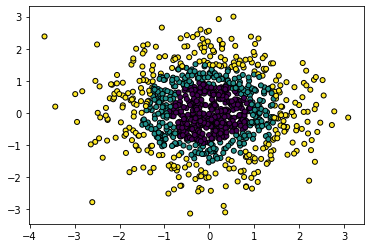

Epoch: 46  | time in 0 minutes, 0 seconds
	Train Loss: 0.0033	|	Accuracy: 0.952000
	Validation Loss: 0.0033	|	Accuracy: 0.954000


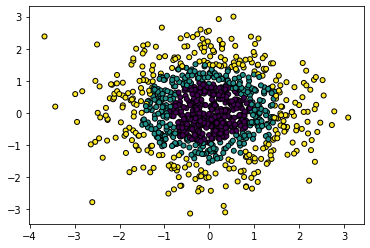

Epoch: 47  | time in 0 minutes, 0 seconds
	Train Loss: 0.0032	|	Accuracy: 0.952571
	Validation Loss: 0.0033	|	Accuracy: 0.951500


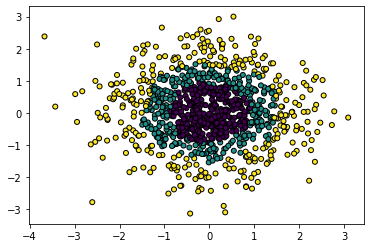

Epoch: 48  | time in 0 minutes, 0 seconds
	Train Loss: 0.0032	|	Accuracy: 0.953000
	Validation Loss: 0.0032	|	Accuracy: 0.950500


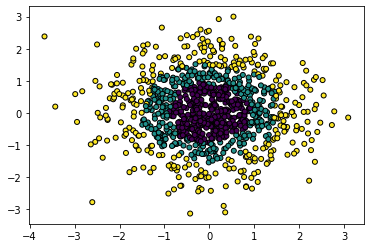

Epoch: 49  | time in 0 minutes, 0 seconds
	Train Loss: 0.0031	|	Accuracy: 0.953714
	Validation Loss: 0.0032	|	Accuracy: 0.950000


In [273]:
class Net(nn.Module):
    def __init__(self, input_size, output_size, hidden1_size):
        super().__init__()

        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.fc2 = nn.Linear(hidden1_size, output_size)

        #init
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        torch.nn.init.zeros_(self.fc1.bias)
        torch.nn.init.zeros_(self.fc2.bias)

    def forward(self, batch):
        a1 = self.fc1(batch)
        a1 = F.relu(a1)
    return self.fc2(a1)

model = Net(2,3,5)
wd=0.0000
lr=0.001
epochs=50
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
train_n_epochs(model,epochs,optimizer)